In [ ]:
from __future__ import print_function
import tensorflow
import json
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from keras import models
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
weight_decay = 0.0005
batch_size = 50
nb_epoch = 10
nb_classes=10


In [ ]:
model = Sequential()
layer_num = 0
hist_l = []
hist_a = []

class cifar10vgg:
    def __init__(self, train=True):
        self.model = model
        self.layer_num = layer_num
        self.hist_l = hist_l
        self.hist_a = hist_a
        self.num_classes = 10
        self.weight_decay = 0.0005
        self.x_shape = [32, 32, 3]

        self.model = self.build_model()
        if train:
            self.model = self.train(self.model)
        else:
            self.model.load_weights('/content/drive/MyDrive/cifar10vgg.h5')
    def custom_loss(y_actual, y_pred):
        custom_loss = K.square(y_actual - y_pred)
        return custom_loss

    def build_model(self):
        
        if layer_num != 0:
          for i in range(3):
            model.pop()

        weight_decay = self.weight_decay


        if layer_num == 0:

          model.add(Conv2D(64, (3, 3), padding='same',
                              input_shape=self.x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(MaxPooling2D(pool_size=(2, 2)))


        if layer_num == 1:
          for layer in model.layers:
            layer.trainable = False
          model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(MaxPooling2D(pool_size=(2, 2)))

        if layer_num == 2:
          for layer in model.layers:
            layer.trainable = False
          model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
          model.add(Activation('relu'))

        
        if layer_num == 3:
          for layer in model.layers:
            layer.trainable = False
          model.add(Conv2D(256 , (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(MaxPooling2D(pool_size=(2, 2)))

        if layer_num == 4:
          for layer in model.layers:
            layer.trainable = False
          model.add(Conv2D(512 , (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
          model.add(Activation('relu'))

        if layer_num == 5:
          for layer in model.layers:
            layer.trainable = False
          model.add(Conv2D(512 , (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(MaxPooling2D(pool_size=(2, 2)))


        if layer_num == 6:
          for layer in model.layers:
            layer.trainable = False
          model.add(Conv2D(512 , (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
          model.add(Activation('relu'))

        if layer_num == 7:
          for layer in model.layers:
            layer.trainable = False
          model.add(Conv2D(512 , (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
          model.add(Activation('relu'))
          model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
        
        model.add(Flatten())
        model.add(Dense(self.num_classes))
        model.add(Activation('softmax'))

        return model

    def normalize(self, x_train, x_test):
        mean = np.mean(x_train,axis=(0,1,2,3))
        std = np.std(x_train, axis=(0, 1, 2, 3))
        x_train = (x_train-mean)/(std+1e-7)
        x_test = (x_test-mean)/(std+1e-7)
        return x_train, x_test

    def normalize_production(self, x):
        mean = 120.707
        std = 64.15
        x = (x-mean)/(std+1e-7)
        return x

    def predict(self, x, normalize=True, batch_size=50):
        if normalize:
            x = self.normalize_production(x)
        return self.model.predict(x, batch_size)

    def train(self, model):
        batch_size = 128
        maxepoches = 20
        learning_rate = 0.001
        lr_decay = 1e-6
        lr_drop = 20
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')

        x_train_s= []
        y_train_s= []
        for i in range(10):
          c = 0
          for j in range(len(y_train)):
            if c == 500:
              break
            if y_train[j][0] == i:
              x_train_s.append(x_train[j])
              y_train_s.append(y_train[j][0])
              c += 1

        x_train, y_train = shuffle(x_train_s, y_train_s)
        x_train = np.array(x_train)
        x_train, x_test = self.normalize(x_train, x_test)
        y_train = np.array(y_train)
        y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
        y_test = tensorflow.keras.utils.to_categorical(y_test, 10)
        x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle= True)

        def lr_scheduler(self, epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
        reduce_lr = tensorflow.keras.callbacks.LearningRateScheduler(lr_scheduler)

        # data augmentation
        datagen = ImageDataGenerator(
            featurewise_std_normalization=False,
            samplewise_std_normalization=False)
        
        datagen.fit(x_train)

        sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

        historytemp = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                                steps_per_epoch=x_train.shape[0] // batch_size,
                                epochs=maxepoches,
                                validation_data=(x_valid, y_valid),
                                callbacks=[reduce_lr],
                                verbose=1)

        history_dict = historytemp.history
        hist_l.append(history_dict['loss'][-1])
        hist_a.append(history_dict['accuracy'][-1])
        # Save the model
        print("batchsize :")
        print(history_dict)
        model.save_weights('/content/drive/MyDrive/cifar10vgg'+str(layer_num)+'.h5')
        model.save("/content/drive/MyDrive/vifar"+str(layer_num)+".h5")
        return model

In [ ]:
for i in range(8):
  layer_num = i
  mymodel= cifar10vgg()
  model.summary()

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


31/31 [==============================] - 8s 19ms/step - loss: 2.1437 - accuracy: 0.2198 - val_loss: 2.0048 - val_accuracy: 0.2850 - lr: 0.0010
Epoch 2/20
31/31 [==============================] - 0s 10ms/step - loss: 1.9078 - accuracy: 0.3404 - val_loss: 1.8832 - val_accuracy: 0.3470 - lr: 0.0010
Epoch 3/20
31/31 [==============================] - 0s 12ms/step - loss: 1.8078 - accuracy: 0.3683 - val_loss: 1.8241 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 4/20
31/31 [==============================] - 0s 11ms/step - loss: 1.7466 - accuracy: 0.3933 - val_loss: 1.7804 - val_accuracy: 0.3930 - lr: 0.0010
Epoch 5/20
31/31 [==============================] - 0s 12ms/step - loss: 1.6867 - accuracy: 0.4205 - val_loss: 1.7600 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 6/20
31/31 [==============================] - 0s 14ms/step - loss: 1.6411 - accuracy: 0.4352 - val_loss: 1.7447 - val_accuracy: 0.3900 - lr: 0.0010
Epoch 7/20
31/31 [==============================] - 0s 13ms/step - loss: 1.6043 - accur

Text(0, 0.5, 'accuracy')

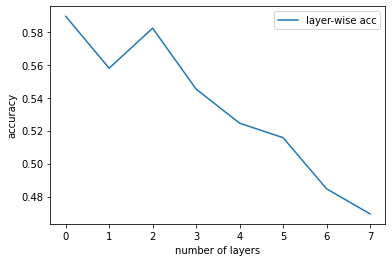

In [ ]:
plt.plot(hist_a,label='layer-wise acc')
plt.legend()
plt.xlabel('number of layers')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

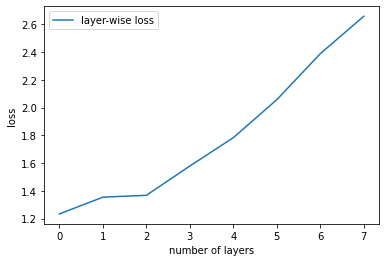

In [ ]:
plt.plot(hist_l,label = 'layer-wise loss')
plt.legend()
plt.xlabel('number of layers')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

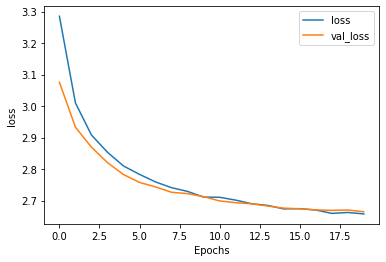

In [ ]:
plt.plot(model.history.history['loss'],label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

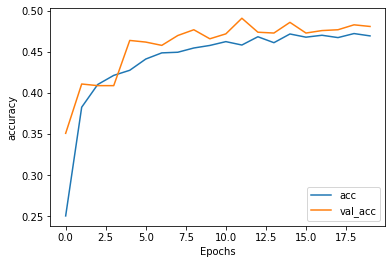

In [ ]:
plt.plot(model.history.history['accuracy'],label = 'acc')
plt.plot(model.history.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')

In [ ]:
vgg_model = models.load_model("/content/drive/MyDrive/vifar7.h5")

In [ ]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 activation_2 (Activation)   (None, 16, 16, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [ ]:
from sklearn.utils import shuffle

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train_s= []
y_train_s= []
for i in range(10):
  c = 0
  for j in range(len(y_train)):
    if c == 100:
      break
    if y_train[j][0] == i:
      x_train_s.append(x_train[j])
      y_train_s.append(y_train[j][0])
      c += 1

x_train = np.array(x_train_s)
y_train = np.array(y_train_s)
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [ ]:
np.shape(vgg_model.layers)

(24,)

In [ ]:
csi_history = []
for idx in range(24):
  if idx == 2 or idx == 4 or idx == 6 or idx == 9 or idx == 11 or idx == 14 or idx == 16 or idx == 19:
    index_layer = idx
    # index_layer = 4*(index_layer1 + 1) - 1
    out_shape = vgg_model.layers[index_layer].output.type_spec.shape
    out_dim = out_shape[1] * out_shape[2] * out_shape[3]

    embed_model = models.Model(inputs=vgg_model.input, outputs=vgg_model.layers[index_layer].output)

    # normalize the data with normalize function from cifar10vgg class
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train, axis=(0, 1, 2, 3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)

    pred_out = embed_model.predict(x_train)

    pred_out = pred_out.reshape(len(y_train), out_dim, 1)

    mu_list = []

    # calculate means
    for i in range(0, 10):
        class_mean = np.mean(pred_out[100*i:100*(i+1)], axis=0)
        mu_list.append(class_mean)

    mu_list = np.array(mu_list)

    # center based SI calculation
    counter = 0
    for i in range(1000):
        dis_list = []
        for j in range(0, 10):
          dis_list.append(cdist(pred_out[i].T, mu_list[j].T)[0])

        if np.argmin(np.array(np.reshape(dis_list,(10,)))) == np.argmax(y_train[i]):
            counter += 1

    csi = (counter/len(y_train))*100

    csi_history.append(csi)

    print(f"CSI {index_layer} : {csi:3f} %")

32/32 [==============================] - 0s 1ms/step
CSI 2 : 37.600000 %
32/32 [==============================] - 0s 2ms/step
CSI 4 : 38.900000 %
32/32 [==============================] - 0s 2ms/step
CSI 6 : 42.600000 %
32/32 [==============================] - 0s 2ms/step
CSI 9 : 43.400000 %
32/32 [==============================] - 0s 3ms/step
CSI 11 : 42.100000 %
32/32 [==============================] - 0s 4ms/step
CSI 14 : 41.300000 %
32/32 [==============================] - 0s 5ms/step
CSI 16 : 39.700000 %
32/32 [==============================] - 0s 4ms/step
CSI 19 : 39.800000 %


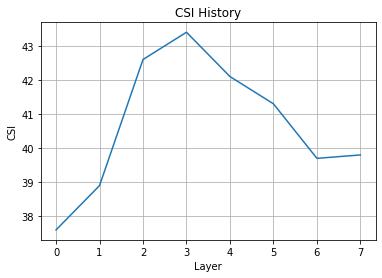

In [ ]:
# Plot the CSI history
plt.plot(csi_history)
plt.xlabel('Layer')
plt.ylabel('CSI')
plt.title('CSI History')
plt.grid()
plt.show()

In [ ]:
csi_history = []
for index_layer in range(21):
  out_shape = vgg_model.layers[index_layer].output.type_spec.shape
  out_dim = out_shape[1] * out_shape[2] * out_shape[3]

  embed_model = models.Model(inputs=vgg_model.input, outputs=vgg_model.layers[index_layer].output)

  # normalize the data with normalize function from cifar10vgg class
  mean = np.mean(x_train,axis=(0,1,2,3))
  std = np.std(x_train, axis=(0, 1, 2, 3))
  x_train = (x_train-mean)/(std+1e-7)
  x_test = (x_test-mean)/(std+1e-7)

  pred_out = embed_model.predict(x_train)

  pred_out = pred_out.reshape(len(y_train), out_dim, 1)

  mu_list = []

  # calculate means
  for i in range(0, 10):
      class_mean = np.mean(pred_out[100*i:100*(i+1)], axis=0)
      mu_list.append(class_mean)

  mu_list = np.array(mu_list)

  # center based SI calculation
  counter = 0
  for i in range(1000):
      dis_list = []
      for j in range(0, 10):
        dis_list.append(cdist(pred_out[i].T, mu_list[j].T)[0])

      if np.argmin(np.array(np.reshape(dis_list,(10,)))) == np.argmax(y_train[i]):
          counter += 1

  csi = (counter/len(y_train))*100

  csi_history.append(csi)

  print(f"CSI {index_layer} : {csi:3f} %")

32/32 [==============================] - 0s 1ms/step
CSI 0 : 32.400000 %
32/32 [==============================] - 0s 1ms/step
CSI 1 : 36.100000 %
32/32 [==============================] - 0s 1ms/step
CSI 2 : 37.600000 %
32/32 [==============================] - 0s 1ms/step
CSI 3 : 38.300000 %
32/32 [==============================] - 0s 1ms/step
CSI 4 : 38.900000 %
32/32 [==============================] - 0s 1ms/step
CSI 5 : 39.800000 %
32/32 [==============================] - 0s 2ms/step
CSI 6 : 42.600000 %
32/32 [==============================] - 0s 2ms/step
CSI 7 : 42.900000 %
32/32 [==============================] - 0s 2ms/step
CSI 8 : 43.200000 %
32/32 [==============================] - 0s 2ms/step
CSI 9 : 43.400000 %
32/32 [==============================] - 0s 2ms/step
CSI 10 : 41.100000 %
32/32 [==============================] - 0s 3ms/step
CSI 11 : 42.100000 %
32/32 [==============================] - 0s 3ms/step
CSI 12 : 42.800000 %
32/32 [==============================] - 0s 4ms/

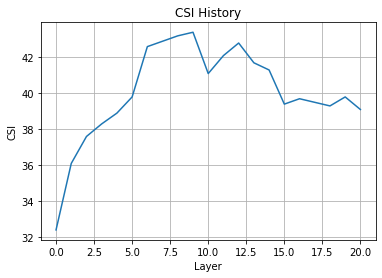

In [ ]:
# Plot the CSI history
plt.plot(csi_history)
plt.xlabel('Layer')
plt.ylabel('CSI')
plt.title('CSI History')
plt.grid()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss:', test_loss)
print('Test_accuracy:', test_accuracy)

Test_loss: 2.7204322814941406
Test_accuracy: 0.438400000333786
